In [100]:
import matplotlib.pyplot as plt
import numpy
import scipy.linalg
from scipy.cluster.vq import kmeans

# Introduction

Let's create a Principal Component Analysis exmaple. We don't have a set of data, so we need to create one. Let's create it in a way that we know the clusters we will get.

$$ N = 38 $$

$$ F = 12 $$

Each family will have $F$ vectors.

$$
M_1 = ones(N,1) + \mbox{randomData}
$$

$$
M_2 = zeros(N,1) + \mbox{randomData}
$$

$$
M_3 = range(N).reshape(N,1) + \mbox{randomData}
$$

Therefore, we will have three clusters, one for the family of of matrices 1, another for family 2 and one more for family 3.

First, let's create those data.

# Random Numbers

$numpy.random.rand$ returns numbers in the range $[0,1]$. To make its range smaller, simply multiply by a range controller $randomRange$:

$$ randomRange \cdot numpy.random.rand(N,N) $$

In [101]:
N = 38
randomRange = 0.5
familySize = 12

matrixFamily_1 = [ numpy.ones((1,N)) + randomRange*numpy.random.rand(1,N) for i in range(familySize) ]
matrixFamily_2 = [ numpy.zeros((1,N)) + randomRange*numpy.random.rand(1,N) for i in range(familySize) ]
matrixFamily_3 = [ numpy.arange(N).reshape(1,N) + randomRange*numpy.random.rand(1,N) for i in range(familySize) ]

# Matrix Assembly

To assmbly the matrix, simply insert each vector inside each matrix family into a column.

In [102]:
matrix = numpy.empty((N, 3*familySize))
for index, vector in enumerate(matrixFamily_1 + matrixFamily_2 + matrixFamily_3):
    matrix[:,index] = vector

# Principal Component Analysis

Now let's follow the principal component analysis steps.

1. Compute the average vector and subtract it from all the others.
2. Compute the SVD factoration.

$$
\mathcal{M} = U \cdot \Sigma \cdot V^t
$$

In [103]:
averageVector = numpy.sum(matrix, axis=1).reshape(N,1)
matrix = matrix - averageVector # numpy will broadcast the vector

U, singularValues, Vt = scipy.linalg.svd(matrix, full_matrices=False, compute_uv=True, check_finite=True)

# Singular Values Plot

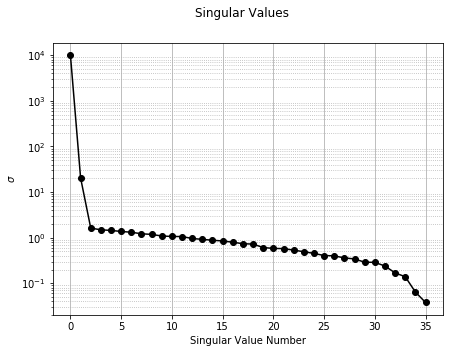

In [104]:
fig = plt.figure(1, figsize=(7,5))
ax = fig.add_subplot(1,1,1)
ax.semilogy(numpy.arange(len(singularValues)), singularValues, color='k', linestyle='-', marker='o')
ax.grid()
fig.suptitle('Singular Values')
ax.set_ylabel('$\sigma$')
ax.set_xlabel('singular value number'.title())
ax.grid(which='major', axis='y')
ax.grid(which='minor', axis='y', linestyle=':')

plt.show()
plt.close(fig)

It is possible to see that only the first two singular values are relevant.

# Scatter Plot

Now we'd like to see the clusters being formed. To be able to create the plane plot, we will use the first two singular values. We will reduce the matrices size and then make the plot.

To reduce the size:

$$ k = 2 $$

$$
\tilde{\Sigma} = \Sigma[:k,:k]
$$

$$
\tilde{U} = U[:,:k]
$$

$$
\tilde{V^t} = V^t[:k,:]
$$

In [105]:
k = 2

reducedU = U[:,:k]
reducedSingularValues = singularValues[:k]
reducedVt = Vt[:k,:]

Now they are reduced, the points will be located at the positions:

$$
\left[
\begin{array}{c}
    X\\
    Y
\end{array}
\right]
=
\tilde{\Sigma} \cdot \tilde{V^t}
\in
\mathbb{M}(2,3 \cdot F)
$$

To plot, simply use the first line as $x$ position and the second line as $y$ position.
One more detail, the families will be separated by colors. Red for family <font color='red'>$M_1$</font>, blue for family <font color='blue'>$M_2$</font> and green for family <font color='green'>$M_3$</font>.

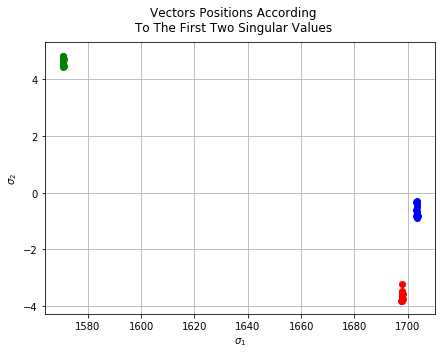

In [106]:
positions = numpy.diag(reducedSingularValues) @ reducedVt

fig = plt.figure(1, figsize=(7,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(positions[0,0*familySize:1*familySize], positions[1,0*familySize:1*familySize], color='red')
ax.scatter(positions[0,1*familySize:2*familySize], positions[1,1*familySize:2*familySize], color='blue')
ax.scatter(positions[0,2*familySize:3*familySize], positions[1,2*familySize:3*familySize], color='green')
ax.grid()
fig.suptitle('Vectors positions according\nto the first two singular values'.title())
ax.set_xlabel('$\sigma_1$')
ax.set_ylabel('$\sigma_2$')
ax.grid(True)

plt.show()
plt.close(fig)

# Analysis

WOW! It works as it should!

It is possible to see in the above graph that the families are grouped together. It is exactly what we want. With the above data, it is possible to calculate clusters using the K-means algorithm.

Well, let's do that.

In [107]:
samples = numpy.transpose(positions)
clusters, _ = kmeans(samples, k_or_guess=3)

I must enphasize that I am not doing that as the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html#scipy.cluster.vq.kmeans) says, I'm not using the 'whiten' function. But I don't care for now, the plot is good.

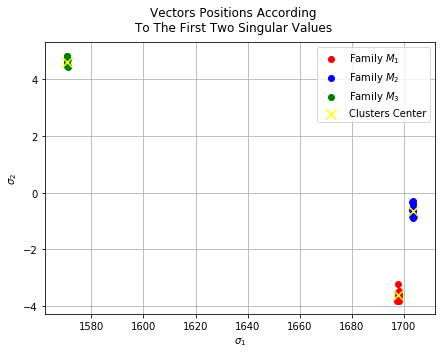

In [108]:
positions = numpy.diag(reducedSingularValues) @ reducedVt

fig = plt.figure(1, figsize=(7,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(positions[0,0*familySize:1*familySize], positions[1,0*familySize:1*familySize], color='red', label=r'Family $M_1$')
ax.scatter(positions[0,1*familySize:2*familySize], positions[1,1*familySize:2*familySize], color='blue', label=r'Family $M_2$')
ax.scatter(positions[0,2*familySize:3*familySize], positions[1,2*familySize:3*familySize], color='green', label=r'Family $M_3$')
ax.scatter(clusters[:,0], clusters[:, 1], color='yellow', marker='x', s=100, label='clusters center'.title())
ax.grid()
fig.suptitle('Vectors positions according\nto the first two singular values'.title())
ax.set_xlabel('$\sigma_1$')
ax.set_ylabel('$\sigma_2$')
ax.legend(loc='best')
ax.grid(True)

plt.show()
plt.close(fig)